<a href="https://colab.research.google.com/github/akshan-main/Delhi-climate-prediction/blob/main/DelhiClimate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LSTM for time series forecasting

#Libraries

In [73]:
import numpy as np

In [74]:
import pandas as pd

In [75]:
import matplotlib.pyplot as plt

In [76]:
from matplotlib.dates import MonthLocator, DateFormatter, YearLocator

In [77]:
from tensorflow import keras

In [78]:
from keras.models import Sequential

In [79]:
from keras.losses import MeanSquaredError

In [80]:
from keras.metrics import RootMeanSquaredError

In [81]:
from keras.layers import Dense, InputLayer, LSTM

In [82]:
from keras.callbacks import ModelCheckpoint

In [83]:
from keras.optimizers import Adam

In [84]:
from keras.models import load_model

#Data Preprocessing

In [85]:
train = pd.read_csv("DCTrain.csv")

In [86]:
test = pd.read_csv("DCTest.csv")

In [87]:
window = 10

In [88]:
def dio(data):
    input = []
    output = []
    for index in range(0, len(data) - window):
        input_sample = data['meantemp'][index:index + window]
        output_sample = data['meantemp'][index + window]
        input.append(input_sample)
        output.append(output_sample)
    return np.array(input), np.array(output)

In [89]:
traini, traino = dio(train)

In [90]:
testi, testo = dio(test)

#NN

In [91]:
def train_neural_network(x, y, epochs=100, lr=0.005):
    model = Sequential()
    model.add(InputLayer((window, 1)))
    model.add(LSTM(64))
    model.add(Dense(10, 'relu'))
    model.add(Dense(1, 'linear'))
    check_point = ModelCheckpoint('model/', save_best_only=True, monitor='loss')
    model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=lr), metrics=[RootMeanSquaredError()])
    model.fit(x, y, epochs=epochs, callbacks=[check_point])
    return model

In [92]:
model = train_neural_network(traini, traino)

Epoch 1/100
46/46 [==============================] - 6s 94ms/step - loss: 495.0443 - root_mean_squared_error: 22.2496
Epoch 2/100
46/46 [==============================] - 4s 86ms/step - loss: 63.1438 - root_mean_squared_error: 7.9463
Epoch 3/100
46/46 [==============================] - 3s 77ms/step - loss: 23.3048 - root_mean_squared_error: 4.8275
Epoch 4/100
46/46 [==============================] - 4s 92ms/step - loss: 4.7630 - root_mean_squared_error: 2.1824
Epoch 5/100
46/46 [==============================] - 4s 90ms/step - loss: 4.0457 - root_mean_squared_error: 2.0114
Epoch 6/100
46/46 [==============================] - 3s 76ms/step - loss: 3.6091 - root_mean_squared_error: 1.8998
Epoch 7/100
46/46 [==============================] - 4s 89ms/step - loss: 3.2621 - root_mean_squared_error: 1.8061
Epoch 8/100
46/46 [==============================] - 4s 91ms/step - loss: 3.2614 - root_mean_squared_error: 1.8059
Epoch 9/100
46/46 [==============================] - 3s 76ms/step - loss: 3

# Actual vs Predict

In [127]:
model = load_model('model/')

In [128]:
trainp = model.predict(traini)

46/46 [==============================] - 1s 3ms/step


In [129]:
testp = model.predict(testi)

4/4 [==============================] - 0s 4ms/step


In [130]:
def plot_predictions(pred, y_true, label, period):
    period = pd.to_datetime(period)  # Converting period to datetime
    plt.figure(figsize=(10, 6))
    plt.plot(period, y_true, label='True Values', marker='o', color='black')
    plt.plot(period, pred, label='Predictions', marker='o', color='red')
    plt.xlabel('Date')
    plt.ylabel('Mean temperature')
    plt.title(label)
    plt.legend()

    if label == "Train Data":
        plt.gca().xaxis.set_major_locator(YearLocator())
        plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
    elif label == "Test Data":
        plt.gca().xaxis.set_major_locator(MonthLocator())
        plt.gca().xaxis.set_major_formatter(DateFormatter('%b %Y'))

    plt.show()

In [131]:
train_period = train[0:len(train) - window]['date']

In [132]:
test_period = test[0:len(test) - window]['date']

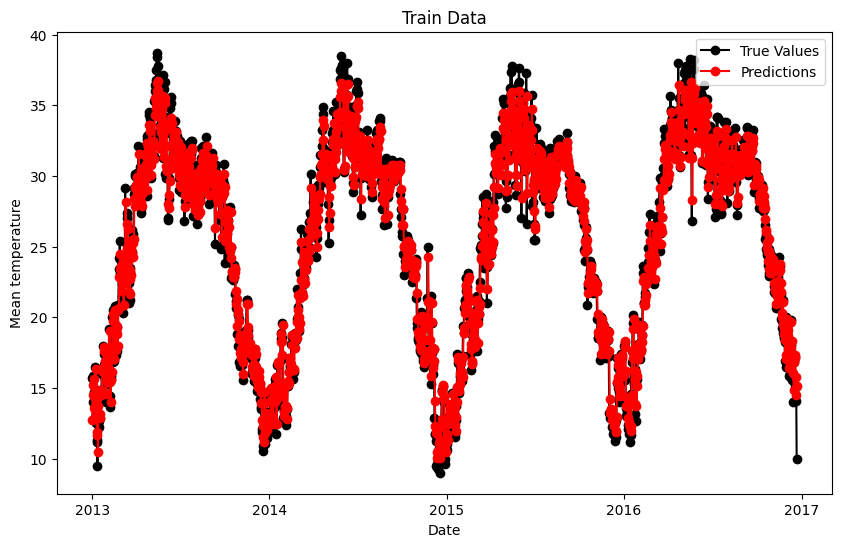

In [133]:
plot_predictions(trainp, traino, 'Train Data', train_period)

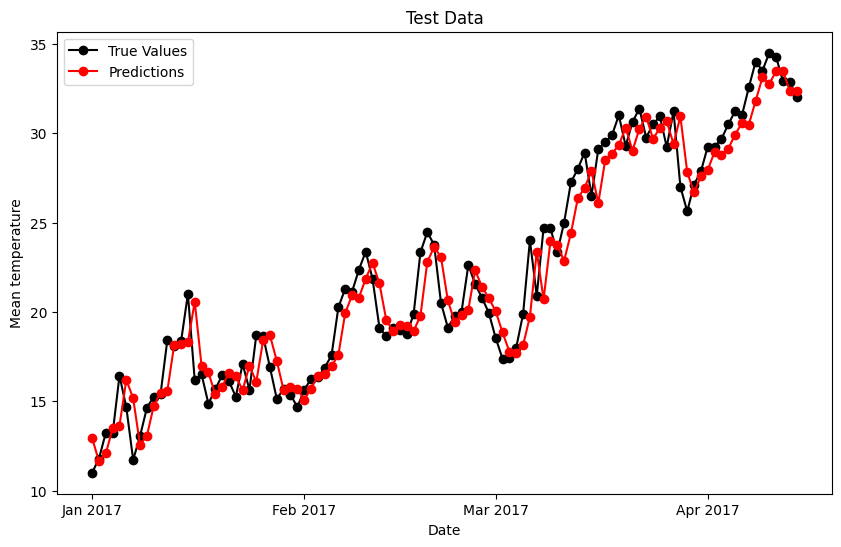

In [134]:
plot_predictions(testp, testo, 'Test Data', test_period)

# Predict future

In [153]:
predictions = []

def predict_future(input_seq, period_prediction: int = 10):
    if period_prediction == 0:
        return None
    new_prediction = model.predict(input_seq)
    predictions.append(new_prediction[0][0])
    new_seq = np.array([np.concatenate((input_seq[0][1:window], new_prediction[0]))])
    predict_future(new_seq, period_prediction - 1)

In [154]:
sequence = np.array([[15, 15.5, 16, 17, 18, 19, 15, 20.5, 21, 22]])

In [155]:
if len(sequence[0]) != window:
    raise ValueError("Size mismatch")

In [156]:
predict_future(sequence)

1/1 [==============================] - 0s 23ms/step


In [157]:
predictions

[21.547092,
 21.203323,
 20.961132,
 20.813343,
 20.770084,
 20.755486,
 20.769793,
 20.757118,
 20.73368,
 20.701763]